In [1]:
import sys
import os
sys.path.append(os.path.abspath("C:/Users/44482978/Desktop/TD8/TD8FINAL/TD8_ProyectoFinal"))
from heuristicas.septima_heuristica import place_rectangles, plot_solution, compute_coverage_ratio, answer_conversion, inverse_answer_conversion
from heuristicas.grid_heuristic import grid_heuristic, solve
from lectura_and_analisis.xml_parsing import xml_data_extractor
from lectura_and_analisis.analisis import calculate_area
from lectura_and_analisis.generacion_mapa import fun_generacion_mapa
from lectura_and_analisis.optimization_functions import change_dimensions, optimize_area

In [2]:
file_path_lari = 'C:/Users/44482978/Desktop/TD8/TD8FINAL/TD8_ProyectoFinal/mapas/'

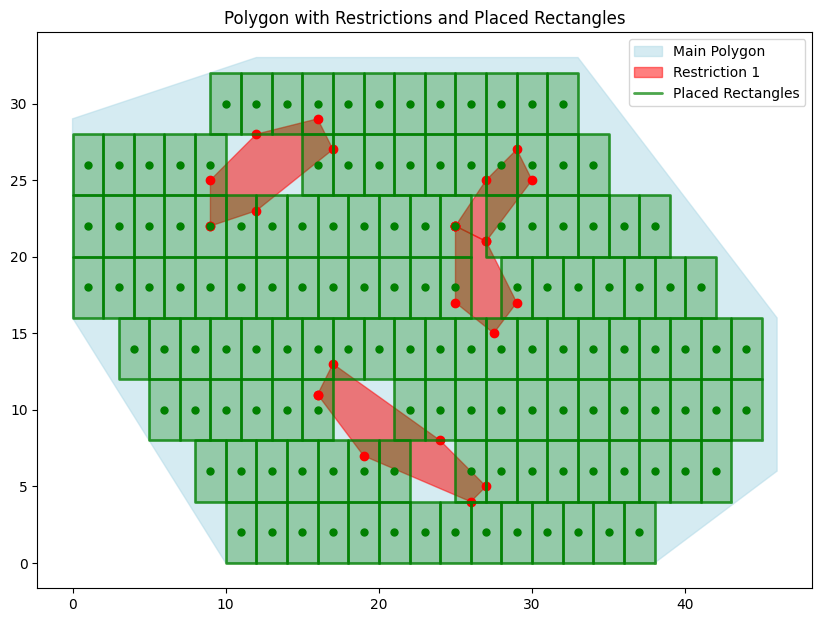

The ratio of the covered area to the polygon area is 84.41%.


 19%|█▉        | 19/100 [11:01<44:01, 32.61s/it] 

In [6]:
paths = ["pol.01.xml", "pol.1s.00.xml", "pol.1s.01.xml", "pol.1s.02.xml", "pol.1s.03.xml", "pol.1s.04.xml", "pol.1s.05.xml", "pol.1s.06.xml", "pol.1s.07.xml", "pol.02.xml", "pol.s2.07.xml", "sqr.01.xml", "sqr.02.xml", "test.01.xml", "test.02.xml"]

for elem in paths:
    # primera vuelta
    yacimiento_coords, pads_data, restricciones_data , angulo= xml_data_extractor(file_path_lari+elem)
    rectangle_size = (pads_data[len(pads_data) - 1][1], pads_data[len(pads_data) - 1][0])
    placed_rectangles = place_rectangles(yacimiento_coords, restricciones_data, rectangle_size, 0)
    plot_solution(yacimiento_coords, restricciones_data, placed_rectangles)
    coverage_ratio = compute_coverage_ratio(placed_rectangles, yacimiento_coords)
    print(f"The ratio of the covered area to the polygon area is {coverage_ratio:.2%}.")

    #optimizado
    placed_rectangles = answer_conversion(placed_rectangles, 1)
    new_result = optimize_area(grid_heuristic , yacimiento_coords, placed_rectangles, pads_data, restricciones_data, 1, 100)
    placed_rectangles = inverse_answer_conversion(placed_rectangles, 1, rectangle_size[1], rectangle_size[0])
    plot_solution(yacimiento_coords, restricciones_data, placed_rectangles)